In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import locale
import folium

In [2]:
from pandas.io.common import codecs
locale.setlocale(locale.LC_ALL, '')

'en_US.UTF-8'

In [3]:
df_data = pd.read_csv(r'Global YouTube Statistics.csv', sep=',', encoding='latin-1')
df_data.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [4]:
df_data.columns = df_data.columns.str.capitalize()
df_data.columns

Index(['Rank', 'Youtuber', 'Subscribers', 'Video views', 'Category', 'Title',
       'Uploads', 'Country', 'Abbreviation', 'Channel_type',
       'Video_views_rank', 'Country_rank', 'Channel_type_rank',
       'Video_views_for_the_last_30_days', 'Lowest_monthly_earnings',
       'Highest_monthly_earnings', 'Lowest_yearly_earnings',
       'Highest_yearly_earnings', 'Subscribers_for_last_30_days',
       'Created_year', 'Created_month', 'Created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [5]:
df_data.head()

,Rank,Youtuber,Subscribers,Video views,Category,Title,Uploads,Country,Abbreviation,Channel_type,...,Subscribers_for_last_30_days,Created_year,Created_month,Created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   Subscribers                              995 non-null    int64  
 3   Video views                              995 non-null    float64
 4   Category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   Uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   Channel_type                             965 non-null    object 
 10  Video_views_rank                         994 non-n

In [7]:
df_data.shape

(995, 28)

In [8]:
df_data.isnull().sum()

Rank                                         0
Youtuber                                     0
Subscribers                                  0
Video views                                  0
Category                                    46
Title                                        0
Uploads                                      0
Country                                    122
Abbreviation                               122
Channel_type                                30
Video_views_rank                             1
Country_rank                               116
Channel_type_rank                           33
Video_views_for_the_last_30_days            56
Lowest_monthly_earnings                      0
Highest_monthly_earnings                     0
Lowest_yearly_earnings                       0
Highest_yearly_earnings                      0
Subscribers_for_last_30_days               337
Created_year                                 5
Created_month                                5
Created_date 

<Axes: >

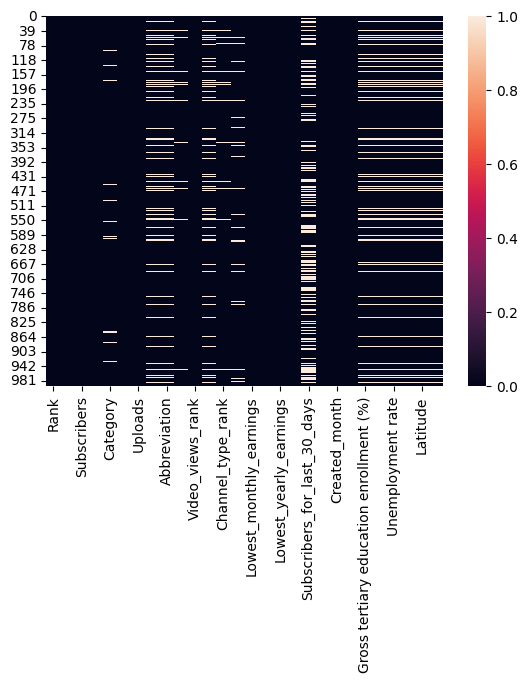

In [49]:
sns.heatmap(df_data.isna())

In [10]:
columnas_numericas = df_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
columnas_numericas

['Rank',
 'Subscribers',
 'Video views',
 'Uploads',
 'Video_views_rank',
 'Country_rank',
 'Channel_type_rank',
 'Video_views_for_the_last_30_days',
 'Lowest_monthly_earnings',
 'Highest_monthly_earnings',
 'Lowest_yearly_earnings',
 'Highest_yearly_earnings',
 'Subscribers_for_last_30_days',
 'Created_year',
 'Created_date',
 'Gross tertiary education enrollment (%)',
 'Population',
 'Unemployment rate',
 'Urban_population',
 'Latitude',
 'Longitude']

In [11]:
df_data['Subscribers'].max()

245000000

In [12]:
top_youtubers = df_data[['Youtuber', 'Subscribers']]
top_youtubers_sorted = top_youtubers.sort_values(by='Subscribers', ascending=False)
top_10_youtubers = top_youtubers_sorted.head(10)
top_10_youtubers

,Youtuber,Subscribers
0,T-Series,245000000
1,YouTube Movies,170000000
2,MrBeast,166000000
3,Cocomelon - Nursery Rhymes,162000000
4,SET India,159000000
5,Music,119000000
6,ýýý Kids Diana Show,112000000
7,PewDiePie,111000000
8,Like Nastya,106000000
9,Vlad and Niki,98900000


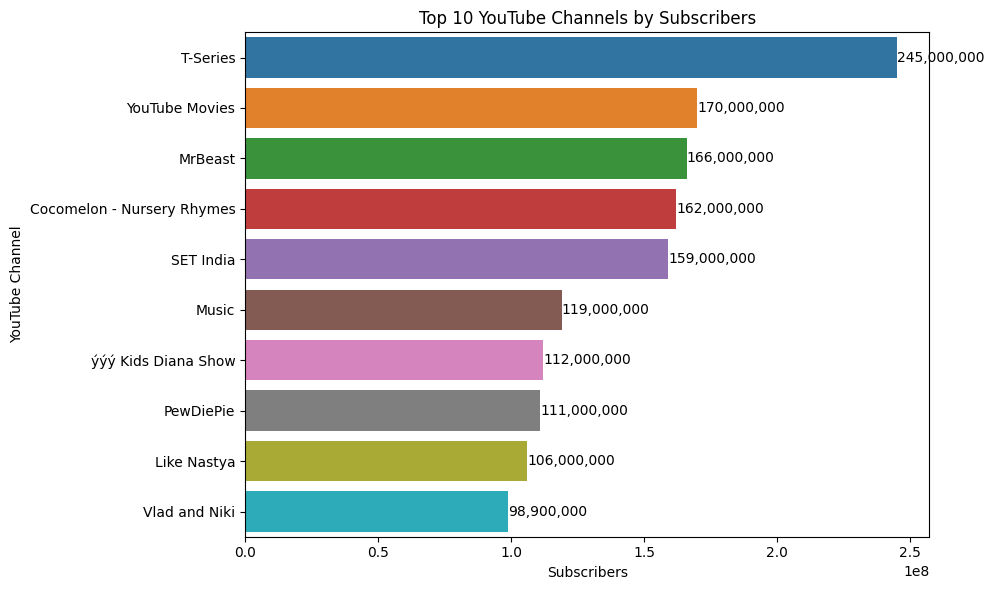

In [13]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(data=top_10_youtubers, x='Subscribers', y='Youtuber', orient='h')

plt.xlabel('Subscribers')
plt.ylabel('YouTube Channel')
plt.title('Top 10 YouTube Channels by Subscribers')

for index, value in enumerate(top_10_youtubers['Subscribers']):
    ax.text(value + 5000, index, f'{value:,}', ha='left', va='center')

plt.tight_layout()
plt.show()

In [14]:
df_data['Category'].unique().tolist()

['Music',
 'Film & Animation',
 'Entertainment',
 'Education',
 'Shows',
 nan,
 'People & Blogs',
 'Gaming',
 'Sports',
 'Howto & Style',
 'News & Politics',
 'Comedy',
 'Trailers',
 'Nonprofits & Activism',
 'Science & Technology',
 'Movies',
 'Pets & Animals',
 'Autos & Vehicles',
 'Travel & Events']

In [15]:
df_data['Category'].value_counts()

Entertainment            241
Music                    202
People & Blogs           132
Gaming                    94
Comedy                    69
Film & Animation          46
Education                 45
Howto & Style             40
News & Politics           26
Science & Technology      17
Shows                     13
Sports                    11
Pets & Animals             4
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           2
Travel & Events            1
Name: Category, dtype: int64

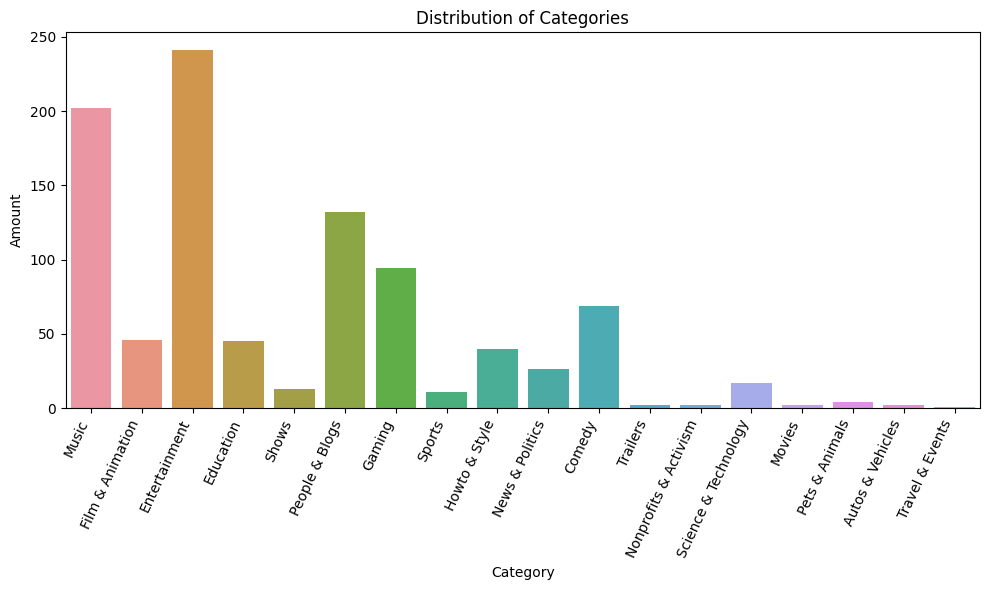

In [16]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df_data, x='Category')

plt.xlabel('Category')
plt.ylabel('Amount')
plt.title('Distribution of Categories')

plt.xticks(rotation=65, ha='right')

plt.tight_layout()
plt.show()

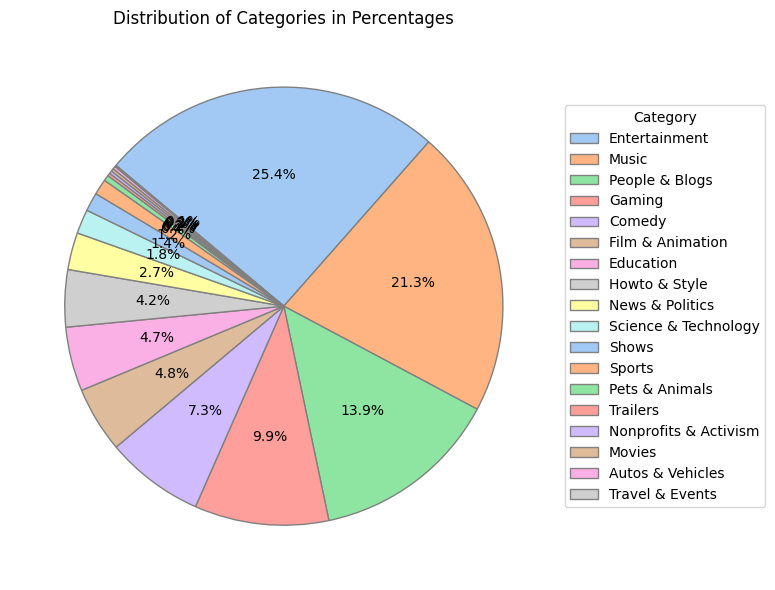

In [17]:
category_counts = df_data['Category'].value_counts()

plt.figure(figsize=(10, 6))

sns.set_palette("pastel")
wedges, texts, autotexts = plt.pie(category_counts, autopct='%.1f%%', startangle=140, counterclock=False, wedgeprops={'edgecolor': 'gray'})

plt.title('Distribution of Categories in Percentages')

plt.legend(wedges, category_counts.index, title="Category", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

In [18]:
df_data['Category'].isnull().sum()

46

In [19]:
category_counts = df_data['Category'].value_counts()

# percentages of each category
total_categories = len(df_data['Category'])
category_percentages = (category_counts / total_categories) * 100

# New DataFrame
result_df = pd.DataFrame({'Category': category_percentages.index, 'Amount': category_counts.values, 'Porcentages': category_percentages.values})

# Add row nulls
result_df.loc[len(result_df)] = ['Nulls', df_data['Category'].isnull().sum(), df_data['Category'].isnull().sum() / total_categories * 100]

# total
total_quantity = result_df['Amount'].sum()
total_percentage = result_df['Porcentages'].sum()

result_df = result_df.sort_values(by='Porcentages', ascending=False)

result_df

,Category,Amount,Porcentages
0,Entertainment,241,24.221106
1,Music,202,20.301508
2,People & Blogs,132,13.266332
3,Gaming,94,9.447236
4,Comedy,69,6.934673
18,Nulls,46,4.623116
5,Film & Animation,46,4.623116
6,Education,45,4.522613
7,Howto & Style,40,4.020101
8,News & Politics,26,2.613065


In [20]:
null_data = df_data[df_data['Category'].isnull()]
columns_to_show = ['Youtuber', 'Subscribers', 'Category']
null_data[columns_to_show].head()

,Youtuber,Subscribers,Category
5,Music,119000000,NaN
12,Gaming,93600000,NaN
18,Sports,75000000,NaN
91,Vlad vï¿½ï¿½ï,37900000,NaN
102,News,36300000,NaN


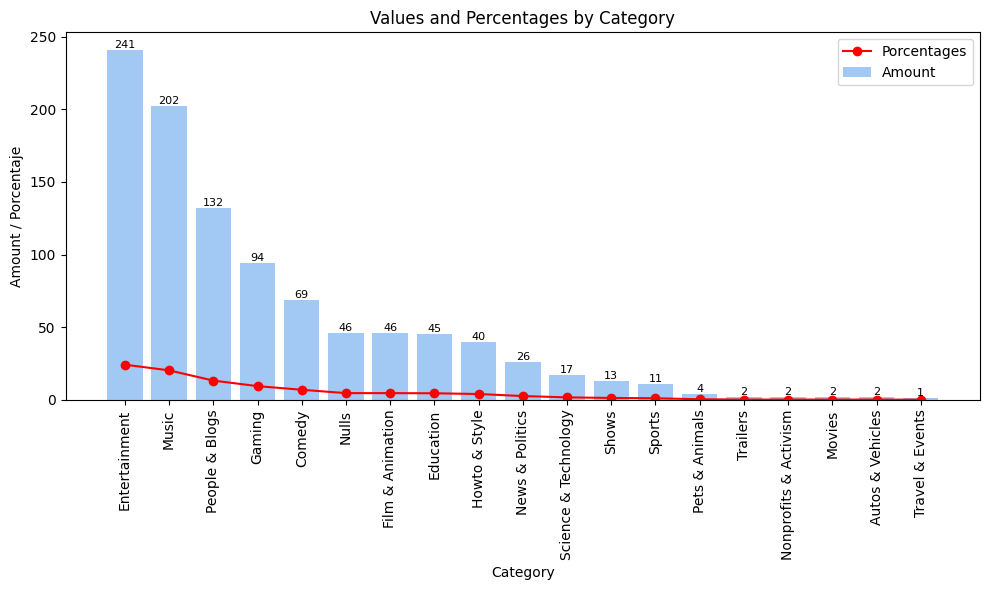

In [21]:
plt.figure(figsize=(10, 6))

bars = plt.bar(result_df['Category'], result_df['Amount'], label='Amount')
line = plt.plot(result_df['Category'], result_df['Porcentages'], marker='o', color='red', label='Porcentages')

plt.xlabel('Category')
plt.ylabel('Amount / Porcentaje')
plt.title('Values ​​and Percentages by Category')
plt.xticks(rotation=90)
plt.legend()

for bar, value in zip(bars, result_df['Amount']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom', fontsize=8, color='black')

#for i, (x, y) in enumerate(zip(result_df['Category'], result_df['Porcentages'])):
#    plt.text(x, y, f"{y:.1f}%", ha='center', va='bottom', fontsize=8, color='black')

plt.tight_layout()
plt.show()

In [22]:
df_data['Channel_type'].unique().tolist()

['Music',
 'Games',
 'Entertainment',
 'Education',
 'People',
 'Sports',
 'Film',
 'News',
 nan,
 'Comedy',
 'Howto',
 'Nonprofit',
 'Autos',
 'Tech',
 'Animals']

In [23]:
df_data['Channel_type'].value_counts()

Entertainment    304
Music            216
People           101
Games             98
Comedy            51
Education         49
Film              42
Howto             36
News              30
Tech              17
Sports            13
Autos              3
Animals            3
Nonprofit          2
Name: Channel_type, dtype: int64

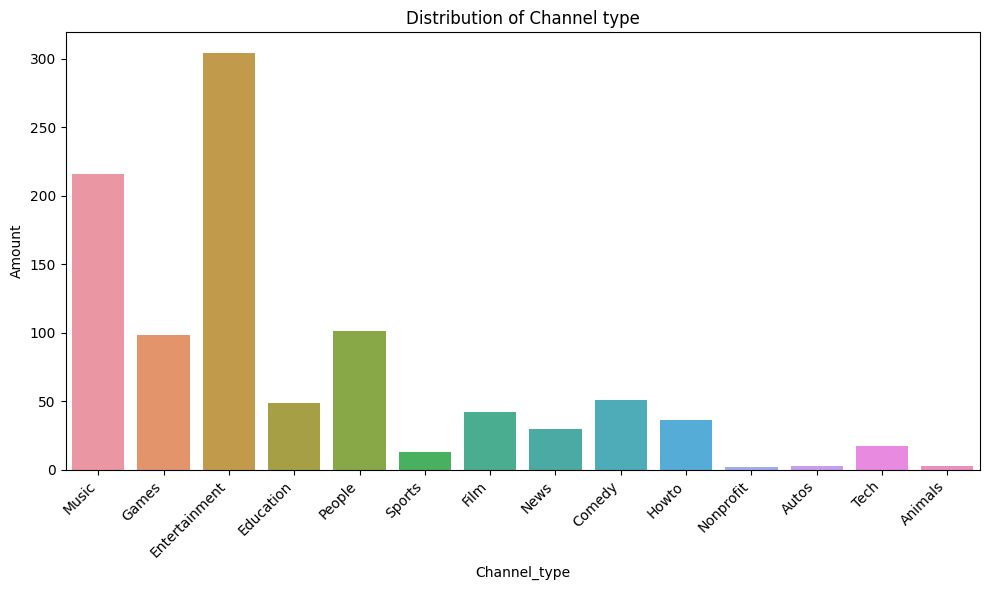

In [24]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df_data, x='Channel_type')

plt.xlabel('Channel_type')
plt.ylabel('Amount')
plt.title('Distribution of Channel type')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [25]:
df_data['Channel_type'].isnull().sum()

30

In [26]:
channel_counts = df_data['Channel_type'].value_counts()

total_channel = len(df_data['Channel_type'])
channel_percentages = (channel_counts / total_channel) * 100

result_df = pd.DataFrame({'Channel_type': channel_percentages.index, 'Amount': channel_counts.values, '%': channel_percentages.values})

result_df.loc[len(result_df)] = ['Nulls', df_data['Channel_type'].isnull().sum(), df_data['Channel_type'].isnull().sum() / total_channel * 100]

total_quantity_channel = result_df['Amount'].sum()
total_percentage_channel = result_df['%'].sum()

result_channel = result_df.sort_values(by='%', ascending=False)

result_channel

,Channel_type,Amount,%
0,Entertainment,304,30.552764
1,Music,216,21.708543
2,People,101,10.150754
3,Games,98,9.849246
4,Comedy,51,5.125628
5,Education,49,4.924623
6,Film,42,4.221106
7,Howto,36,3.618090
8,News,30,3.015075
14,Nulls,30,3.015075


In [27]:
null_channel = df_data[df_data['Channel_type'].isnull()]
columns_to_channel = ['Youtuber', 'Subscribers', 'Channel_type']
null_channel[columns_to_channel].head()

,Youtuber,Subscribers,Channel_type
38,LooLoo Kids - Nursery Rhymes and Children's Songs,54000000,NaN
57,BRIGHT SIDE,44500000,NaN
102,News,36300000,NaN
149,Luis Fonsi,31400000,NaN
166,Frost Diamond,30100000,NaN


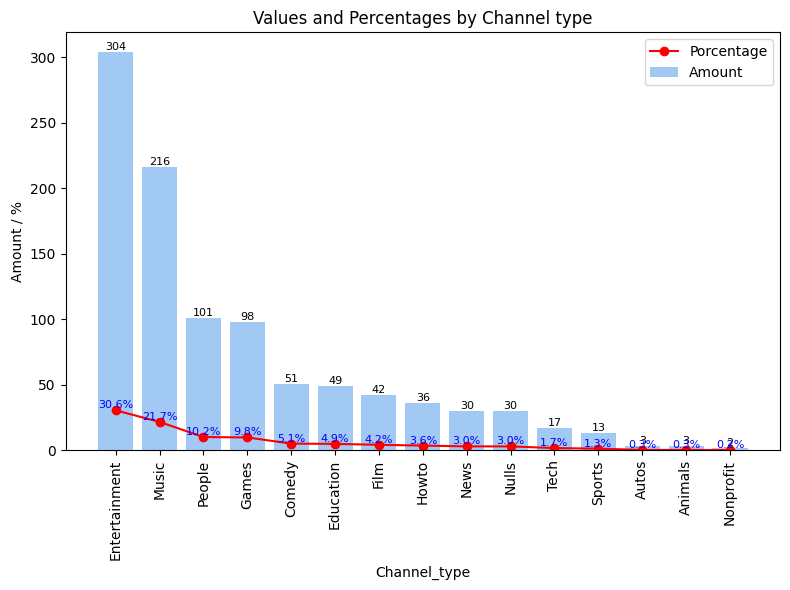

In [28]:
plt.figure(figsize=(8, 6))

bars_channel = plt.bar(result_channel['Channel_type'], result_channel['Amount'], label='Amount')
line = plt.plot(result_channel['Channel_type'], result_channel['%'], marker='o', color='red', label='Porcentage')

plt.xlabel('Channel_type')
plt.ylabel('Amount / %')
plt.title('Values ​​and Percentages by Channel type')
plt.xticks(rotation=90)
plt.legend()

for bar, value in zip(bars_channel, result_channel['Amount']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom', fontsize=8, color='black')

for i, (x, y) in enumerate(zip(result_channel['Channel_type'], result_channel['%'])):
    plt.text(x, y, f"{y:.1f}%", ha='center', va='bottom', fontsize=8, color='blue')

plt.tight_layout()
plt.show()

In [29]:
up_youtubers = df_data[['Youtuber', 'Uploads']]
up_youtubers

,Youtuber,Uploads
0,T-Series,20082
1,YouTube Movies,1
2,MrBeast,741
3,Cocomelon - Nursery Rhymes,966
4,SET India,116536
...,...,...
990,Natan por Aï¿,1200
991,Free Fire India Official,1500
992,Panda,2452
993,RobTopGames,39


In [30]:
co_youtuber = df_data['Youtuber'].value_counts()
count_youtuber = co_youtuber[co_youtuber >= 2]
count_youtuber

Series([], Name: Youtuber, dtype: int64)

In [31]:
youtuber_uploads = df_data.groupby('Youtuber')['Uploads'].sum()

youtuber_uploads_df = youtuber_uploads.reset_index(name='Total_Uploads')
top_10_up = youtuber_uploads_df.sort_values(by='Total_Uploads', ascending=False).head(10)
top_10_up

,Youtuber,Total_Uploads
16,ABP NEWS,301308
284,GMA Integrated News,296272
752,TV9 Bharatvarsh,293516
29,Aaj Tak,283775
353,IndiaTV,273255
405,KOMPASTV,269050
769,Thairath Online,244899
572,News 24,211620
19,ABS-CBN News,209520
746,TEDx Talks,200933


In [32]:
df_data['Uploads'].max()

301308

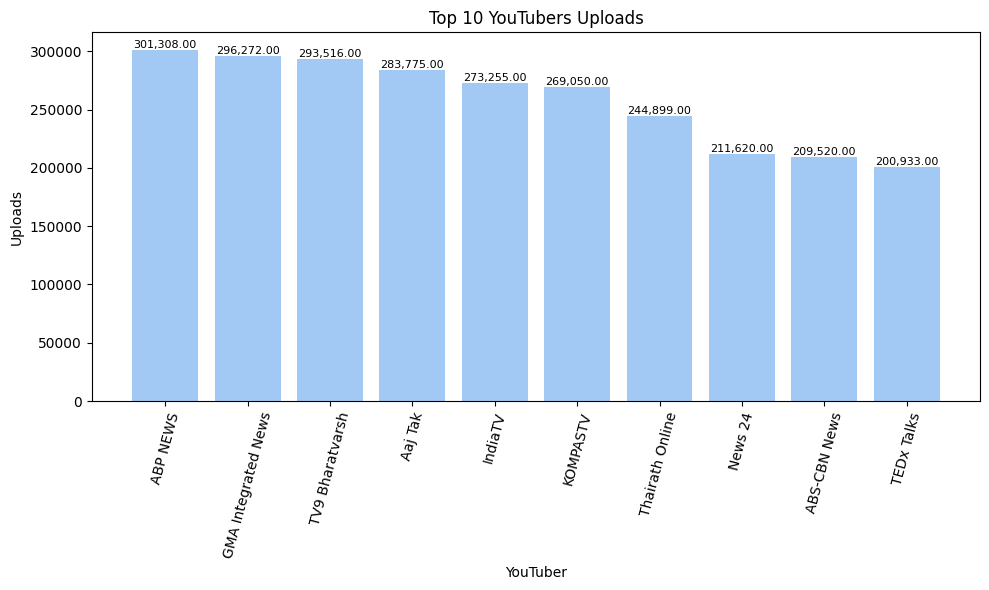

In [33]:
plt.figure(figsize=(10, 6))

bars = plt.bar(top_10_up['Youtuber'], top_10_up['Total_Uploads'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, locale.format_string('%0.2f', yval, grouping=True), ha='center', va='bottom', fontsize=8)

plt.xlabel('YouTuber')
plt.ylabel('Uploads')
plt.title('Top 10 YouTubers Uploads')
plt.xticks(rotation=75)

plt.tight_layout()
plt.show()

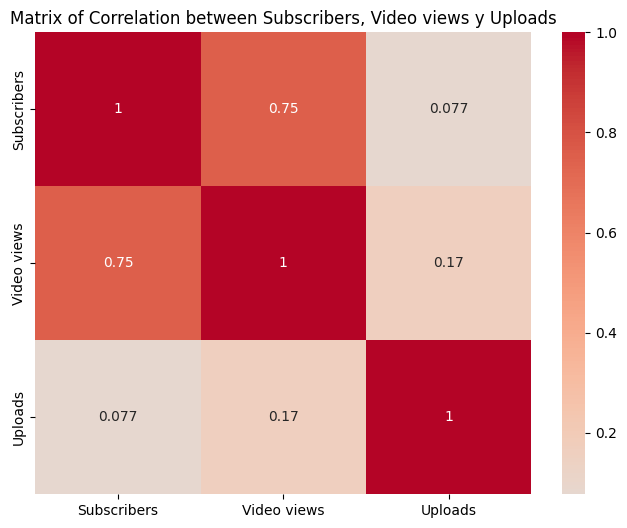

In [34]:
columns_of_interest = ['Subscribers', 'Video views', 'Uploads']

correlation_matrix = df_data[columns_of_interest].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrix of Correlation between Subscribers, Video views y Uploads')
plt.show()

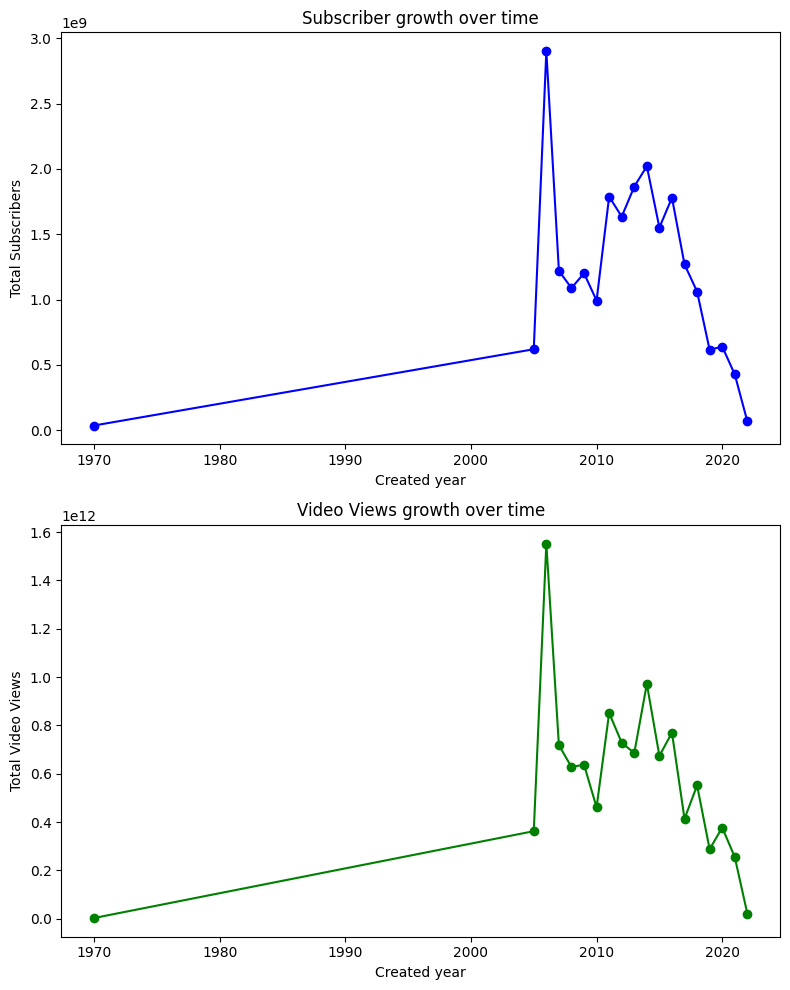

In [35]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Subscribers
subscribers_by_year = df_data.groupby('Created_year')['Subscribers'].sum()
ax1.plot(subscribers_by_year.index, subscribers_by_year.values, marker='o', linestyle='-', color='blue')
ax1.set_xlabel('Created year')
ax1.set_ylabel('Total Subscribers')
ax1.set_title('Subscriber growth over time')

# Video views
views_by_year = df_data.groupby('Created_year')['Video views'].sum()
ax2.plot(views_by_year.index, views_by_year.values, marker='o', linestyle='-', color='green')
ax2.set_xlabel('Created year')
ax2.set_ylabel('Total Video Views')
ax2.set_title('Video Views growth over time')

plt.tight_layout()
plt.show()

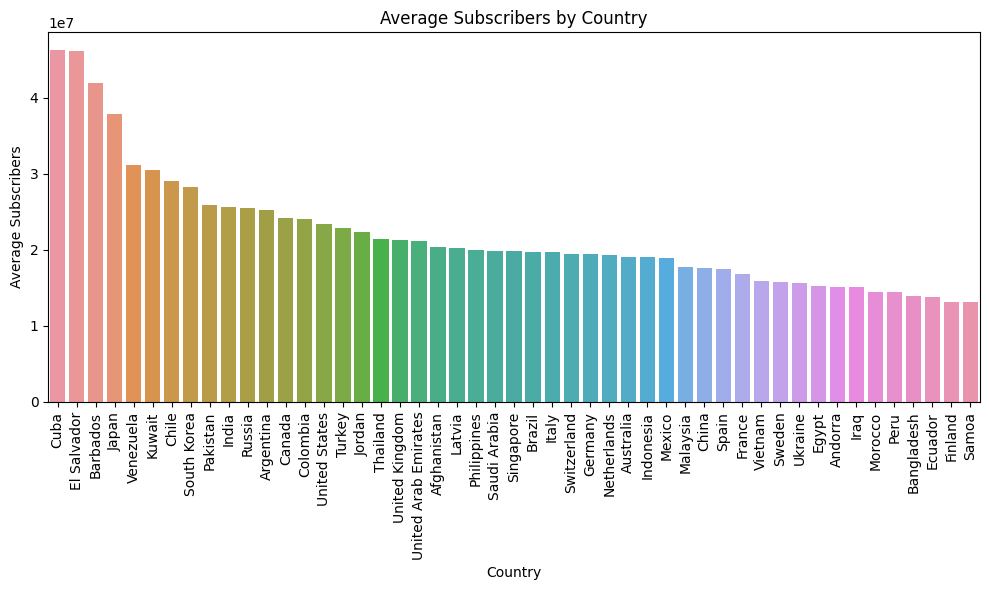

In [36]:
geo_columns = ['Country', 'Subscribers']
geo_df = df_data[df_data['Country'].notnull()]

country_stats = geo_df.groupby('Country')[geo_columns].mean(numeric_only=True).round(2)

country_stats = country_stats.sort_values(by='Subscribers', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=country_stats.index, y='Subscribers', data=country_stats)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average Subscribers')
plt.title('Average Subscribers by Country')
plt.tight_layout()
plt.show()

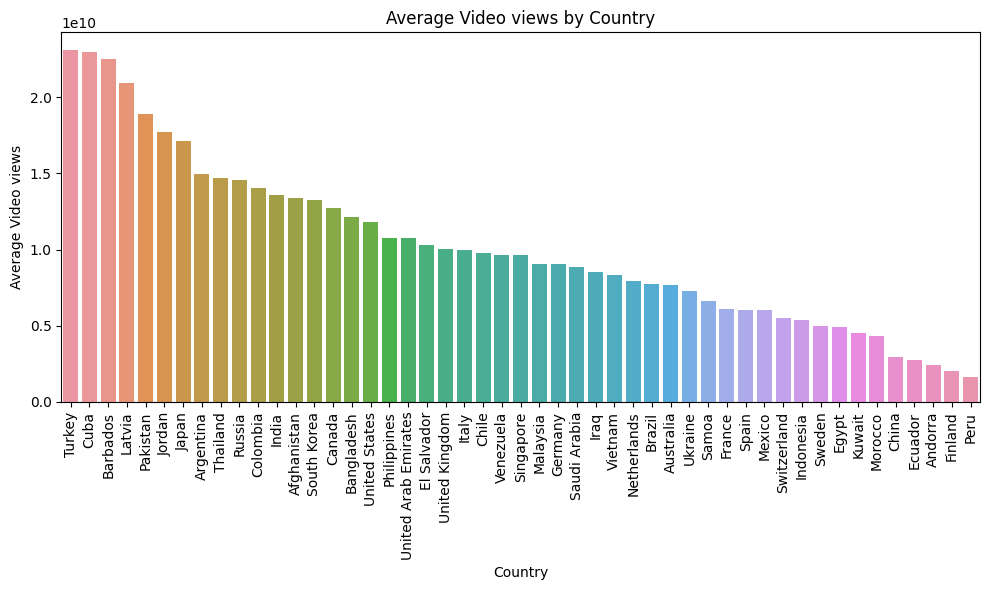

In [37]:
geo_columns = ['Country', 'Video views']
geo_df = df_data[df_data['Country'].notnull()]

country_stats = geo_df.groupby('Country')[geo_columns].mean(numeric_only=True).round(2)
country_stats = country_stats.sort_values(by='Video views', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=country_stats.index, y='Video views', data=country_stats)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average Video views')
plt.title('Average Video views by Country')
plt.tight_layout()

plt.show()


In [38]:
geo_df = df_data[df_data['Latitude'].notnull() & df_data['Longitude'].notnull()]

m = folium.Map(location=[geo_df['Latitude'].mean(), geo_df['Longitude'].mean()], zoom_start=2)

def format_number(number):
    return '{:,}'.format(int(number))

# Add subscriber and view information
for index, row in geo_df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Country: {row['Country']}<br>Subscribers: {format_number(row['Subscribers'])}<br>Views: {format_number(row['Video views'])}",
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Save
m.save('map.html')

<Figure size 1200x800 with 0 Axes>

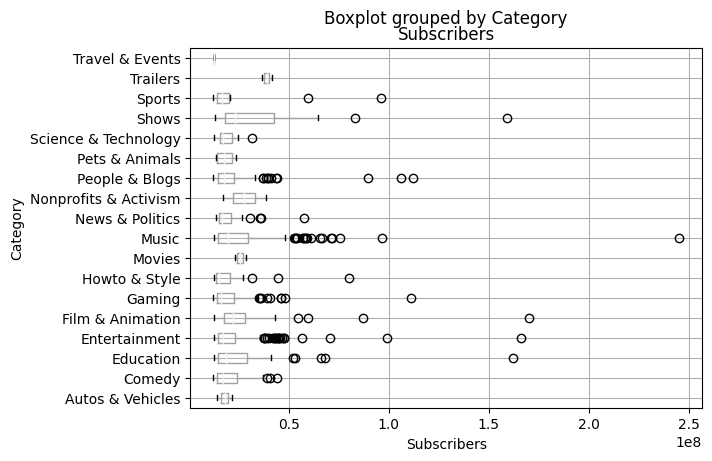

In [39]:
plt.figure(figsize=(12, 8))
df_data.boxplot(column='Subscribers', by='Category', vert=False)

plt.xlabel('Subscribers')
plt.ylabel('Category')
plt.show()

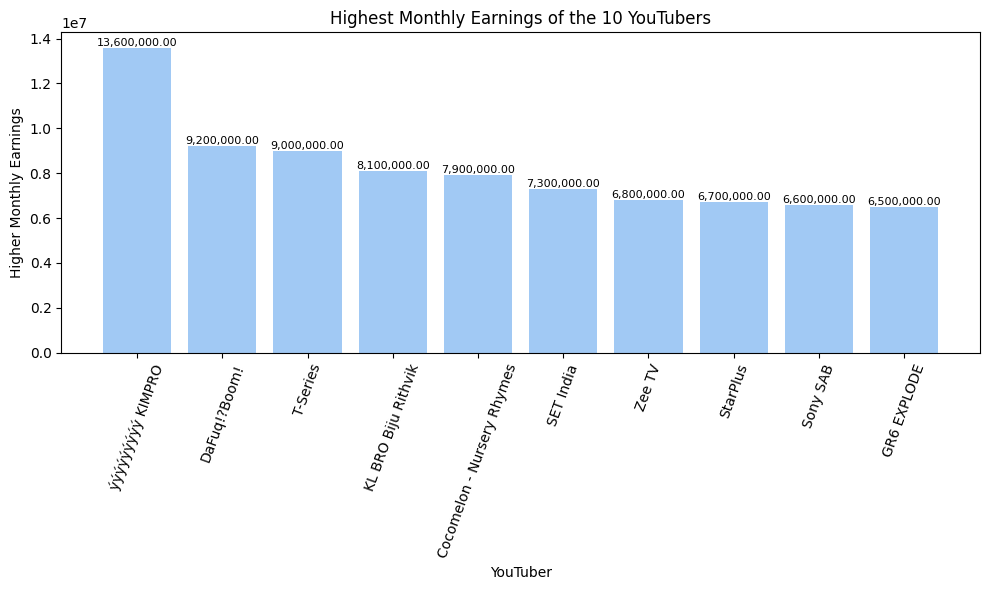

In [40]:
top_10_high_earnings = df_data.nlargest(10, 'Highest_monthly_earnings')

plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_high_earnings['Youtuber'], top_10_high_earnings['Highest_monthly_earnings'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, locale.format_string('%0.2f', yval, grouping=True), ha='center', va='bottom', fontsize=8, color='black')

plt.xlabel('YouTuber')
plt.ylabel('Higher Monthly Earnings')
plt.title('Highest Monthly Earnings of the 10 YouTubers')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

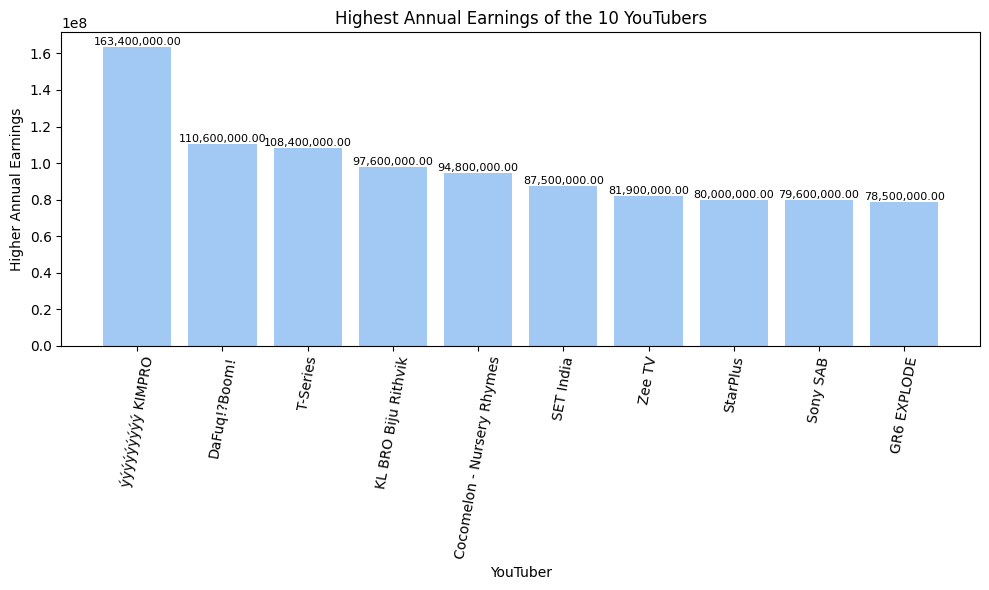

In [41]:
top_10_high_earnings = df_data.nlargest(10, 'Highest_yearly_earnings')

plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_high_earnings['Youtuber'], top_10_high_earnings['Highest_yearly_earnings'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, locale.format_string('%0.2f', yval, grouping=True), ha='center', va='bottom', fontsize=8, color='black')

plt.xlabel('YouTuber')
plt.ylabel('Higher Annual Earnings')
plt.title('Highest Annual Earnings of the 10 YouTubers')
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

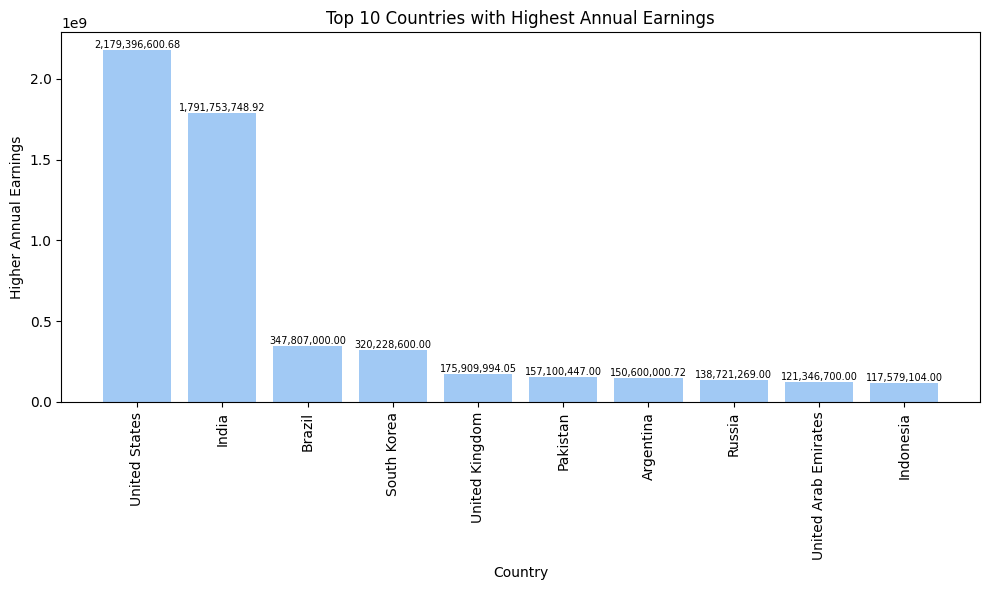

In [42]:
earnings_by_country = df_data.groupby('Country')['Highest_yearly_earnings'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
bars = plt.bar(earnings_by_country.index, earnings_by_country.values)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, locale.format_string('%0.2f', yval, grouping=True), ha='center', va='bottom', fontsize=7, color='black')

plt.xlabel('Country')
plt.ylabel('Higher Annual Earnings')
plt.title('Top 10 Countries with Highest Annual Earnings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

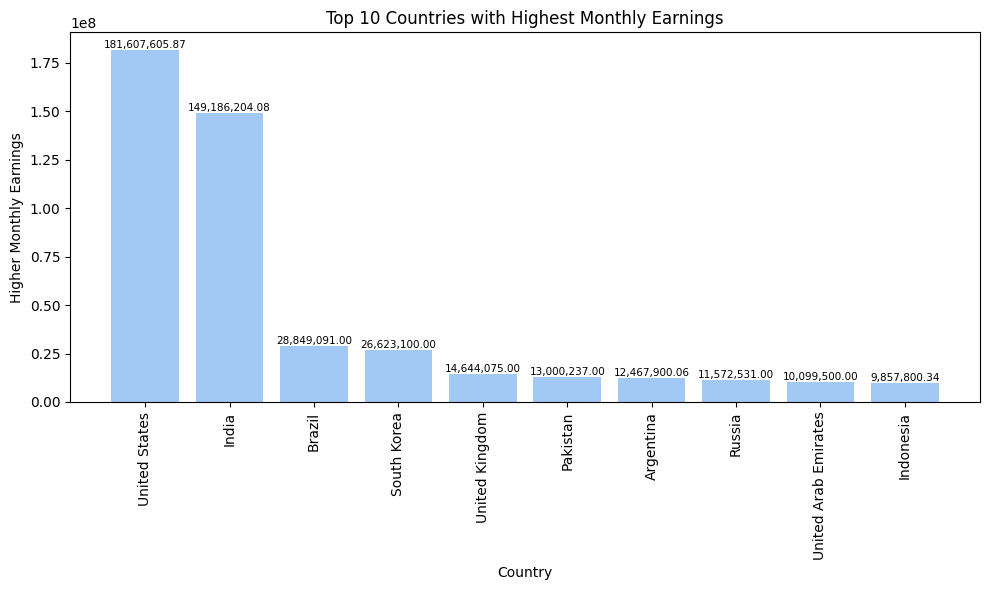

In [43]:
top_10_countries_earnings = df_data.groupby('Country')['Highest_monthly_earnings'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_countries_earnings.index, top_10_countries_earnings.values)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, locale.format_string('%0.2f', yval, grouping=True), ha='center', va='bottom', fontsize=7.5, color='black')

plt.xlabel('Country')
plt.ylabel('Higher Monthly Earnings')
plt.title('Top 10 Countries with Highest Monthly Earnings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [44]:
df_data['Created_year'].unique()

array([2006., 2012., 2013., 2015., 2010., 2016., 2018., 2014., 2007.,
       2020., 2008., 2005., 2011., 2009., 2017., 2021., 1970., 2019.,
         nan, 2022.])

In [45]:
df_data = df_data[(df_data['Created_year'] != 1970) & (~df_data['Created_year'].isnull())]

In [46]:
rows_with_1970 = df_data[df_data['Created_year'] == 1970]
print(rows_with_1970)

Empty DataFrame
Columns: [Rank, Youtuber, Subscribers, Video views, Category, Title, Uploads, Country, Abbreviation, Channel_type, Video_views_rank, Country_rank, Channel_type_rank, Video_views_for_the_last_30_days, Lowest_monthly_earnings, Highest_monthly_earnings, Lowest_yearly_earnings, Highest_yearly_earnings, Subscribers_for_last_30_days, Created_year, Created_month, Created_date, Gross tertiary education enrollment (%), Population, Unemployment rate, Urban_population, Latitude, Longitude]
Index: []

[0 rows x 28 columns]


In [47]:
df_data['Created_year'].unique()

array([2006., 2012., 2013., 2015., 2010., 2016., 2018., 2014., 2007.,
       2020., 2008., 2005., 2011., 2009., 2017., 2021., 2019., 2022.])

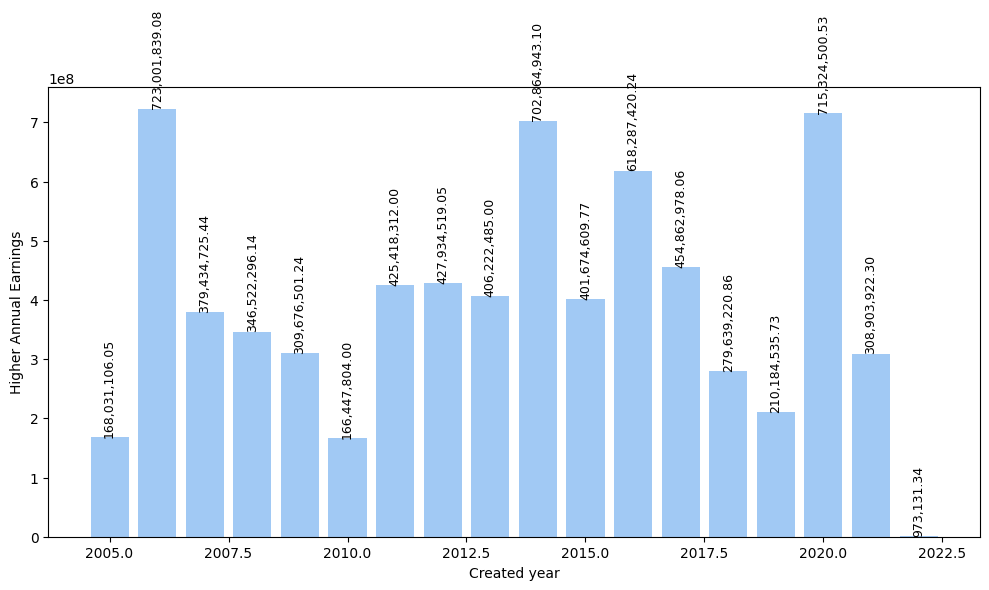

In [48]:
earnings_by_year = df_data.groupby('Created_year')['Highest_yearly_earnings'].sum()

plt.figure(figsize=(10, 6))
bars = plt.bar(earnings_by_year.index, earnings_by_year.values)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, locale.format_string('%0.2f', yval, grouping=True), ha='center', va='bottom', fontsize=9, rotation='vertical')

plt.xlabel('Created year')
plt.ylabel('Higher Annual Earnings')
plt.tight_layout()
plt.show()
